In [1]:
from google.colab import drive
drive.mount('content/')

Drive already mounted at content/; to attempt to forcibly remount, call drive.mount("content/", force_remount=True).


In [3]:
!pip3 install umap-learn

    100% |████████████████████████████████| 40kB 2.4MB/s 
    100% |████████████████████████████████| 3.2MB 8.4MB/s 
    100% |████████████████████████████████| 16.1MB 2.3MB/s 
  Running setup.py bdist_wheel for umap-learn ... - \ done
  Stored in directory: /root/.cache/pip/wheels/be/a5/95/6cb125db66c98d790fa627977d6cacd16c59a6bfeeab957aa3
Successfully built umap-learn


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import umap
from keras.datasets import cifar10
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Activation
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
%matplotlib inline

Using TensorFlow backend.


In [0]:
def plot_embeddings(embedding, target, message):
  plt.figure(figsize = (10, 10))
  plt.scatter(embedding[:, 0], embedding[:, 1], c = target.ravel(), cmap = 'Spectral', s = 5)
  plt.gca().set_aspect('equal', 'datalim')
  plt.colorbar(boundaries = np.arange(11) - 0.5).set_ticks(np.arange(10))
  plt.title(message)

In [0]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1] * X_train.shape[2] * X_train.shape[3]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1] * X_test.shape[2] * X_test.shape[3]))

# **Visualization**

# **Un-Supervised UMAP on Cifar10**

In [6]:
umap_transformer_U = umap.UMAP(n_components = 2, n_neighbors = 20, verbose = True).fit(X_train)
reduced_umap_train_U = umap_transformer_U.transform(X_train)
reduced_umap_test_U = umap_transformer_U.transform(X_test)

UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
   learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
   metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
   n_neighbors=20, negative_sample_rate=5, random_state=None,
   repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
   target_metric='categorical', target_metric_kwds=None,
   target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
   transform_seed=42, verbose=True)
Construct fuzzy simplicial set
	 0  /  16
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	 5  /  16
Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
	completed  0  /  100 epochs
	completed  10  /  100 epochs
	completed  20  /  100 epochs
	complet

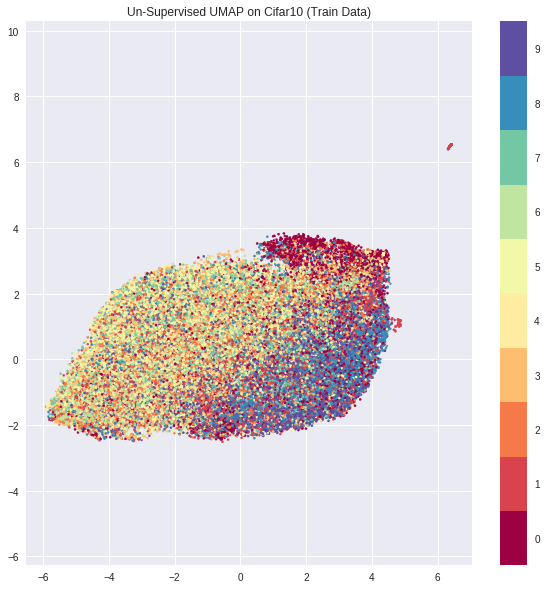

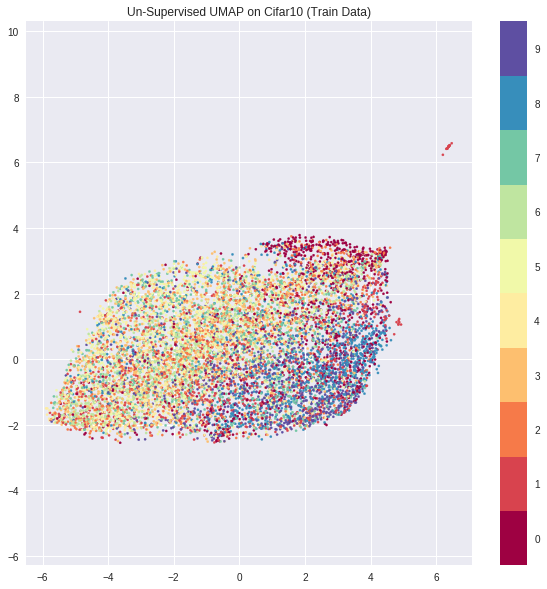

In [7]:
plot_embeddings(reduced_umap_train_U, Y_train, 'Un-Supervised UMAP on Cifar10 (Train Data)')
plot_embeddings(reduced_umap_test_U, Y_test, 'Un-Supervised UMAP on Cifar10 (Train Data)')

# Supervised UMAP on Cifar10

In [8]:
umap_transformer_S = umap.UMAP(n_components = 2, n_neighbors = 20, verbose = True).fit(X_train, Y_train)
reduced_umap_train_S = umap_transformer_S.transform(X_train)
reduced_umap_test_S = umap_transformer_S.transform(X_test)

UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
   learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
   metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
   n_neighbors=20, negative_sample_rate=5, random_state=None,
   repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
   target_metric='categorical', target_metric_kwds=None,
   target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
   transform_seed=42, verbose=True)
Construct fuzzy simplicial set
	 0  /  16
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	 5  /  16
Construct embedding


/usr/local/lib/python3.6/dist-packages/umap/spectral.py:229: UserWarning: Embedding a total of 4 separate connected components using meta-embedding (experimental)
  n_components


	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
	completed  0  /  100 epochs
	completed  10  /  100 epochs
	completed  20  /  100 epochs
	completed  30  /  100 epochs
	completed  40  /  100 epochs
	completed  50  /  100 epochs
	completed  60  /  100 epochs
	completed  70  /  100 epochs
	completed  80  /  100 epochs
	completed  90  /  100 epochs


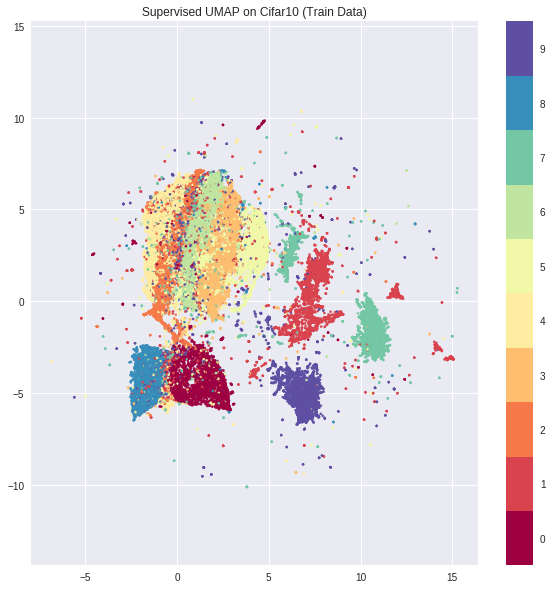

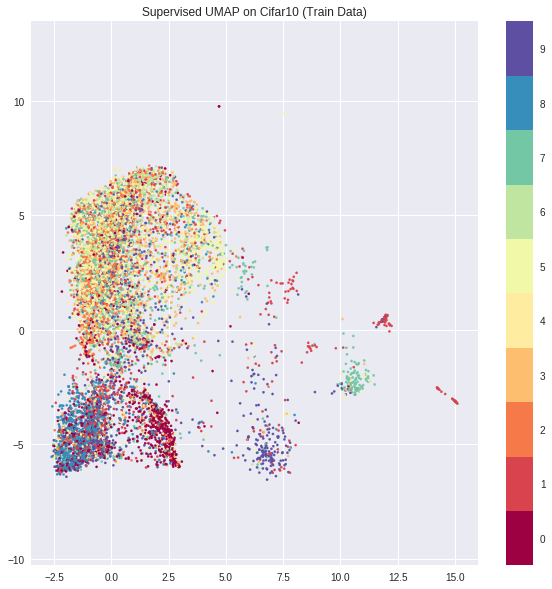

In [9]:
plot_embeddings(reduced_umap_train_S, Y_train, 'Supervised UMAP on Cifar10 (Train Data)')
plot_embeddings(reduced_umap_test_S, Y_test, 'Supervised UMAP on Cifar10 (Train Data)')

# **Auto-Encoder**

In [5]:
inputs = Input(shape = (32, 32, 3))
x = Conv2D(64, (3, 3), padding = 'same')(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2, 2), padding = 'same')(x)
x = Conv2D(32, (3, 3), padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2, 2), padding = 'same')(x)
x = Conv2D(16, (3, 3), padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
encoder = MaxPooling2D((2, 2), padding = 'same')(x)

x = Conv2D(16, (3, 3), padding = 'same')(encoder)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(3, (3, 3), padding = 'same')(x)
x = BatchNormalization()(x)
decoder = Activation('sigmoid')(x)

model = Model(inputs, decoder)
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        18464     
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 32)        128       
__________

In [0]:
filepath = 'autoencoder.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor = 'val_acc', verbose = 1, save_best_only = True, mode = 'max')
callbacks_list = [checkpoint]

In [7]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

170500096/170498071 [==============================] - 25s 0us/step


In [0]:
X_dev = X_test[:7000]
X_test = X_test[7000:]

In [10]:
autoencoder = model.fit(X_train, X_train,
                    batch_size = 32,
                    epochs = 40,
                    verbose = True,
                    validation_data = (X_dev, X_dev),
                    callbacks = callbacks_list,
                    shuffle=True)

Train on 50000 samples, validate on 7000 samples
Epoch 1/40
50000/50000 [==============================] - 42s 847us/step - loss: 0.0060 - acc: 0.7542 - val_loss: 0.0064 - val_acc: 0.7509

Epoch 00001: val_acc did not improve from 0.77489
Epoch 2/40
50000/50000 [==============================] - 43s 857us/step - loss: 0.0061 - acc: 0.7537 - val_loss: 0.0058 - val_acc: 0.7535

Epoch 00002: val_acc did not improve from 0.77489
Epoch 3/40
50000/50000 [==============================] - 42s 837us/step - loss: 0.0060 - acc: 0.7539 - val_loss: 0.0059 - val_acc: 0.7656

Epoch 00003: val_acc did not improve from 0.77489
Epoch 4/40
50000/50000 [==============================] - 42s 835us/step - loss: 0.0060 - acc: 0.7537 - val_loss: 0.0058 - val_acc: 0.7593

Epoch 00004: val_acc did not improve from 0.77489
Epoch 5/40
50000/50000 [==============================] - 40s 805us/step - loss: 0.0060 - acc: 0.7530 - val_loss: 0.0057 - val_acc: 0.7623

Epoch 00005: val_acc did not improve from 0.77489
E

In [11]:
model.evaluate(X_test, X_test, verbose = True)

3000/3000 [==============================] - 1s 218us/step


[0.005630620796233415, 0.7615371092160543]

In [0]:
dev_reconstructed = model.predict(X_dev)
test_reconstructed = model.predict(X_test)

In [0]:
def plot(orig, dec, num):
    plt.figure(figsize = (20, 4))

    for i in range(num):
        ax = plt.subplot(2, num, i + 1)
        plt.imshow(orig[i].reshape(32, 32, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, num, i + 1 + num)
        plt.imshow(dec[i].reshape(32, 32, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
    plt.show()

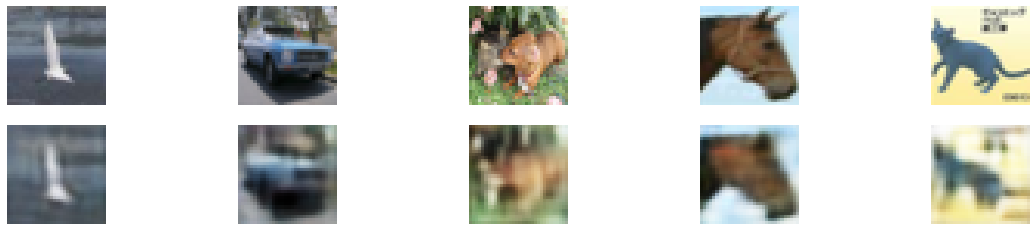

In [21]:
plot(X_test, test_reconstructed, 5)

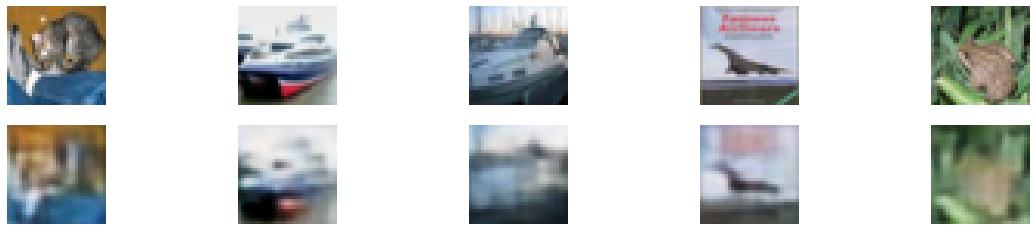